In [3]:
import numpy as np
import pandas as pd
import requests
import plotly.express as px
import plotly.io as pio
pd.set_option("display.max_columns", None)
import osmnx as ox
import networkx as nx
from itertools import combinations

In [4]:
df = pd.read_csv("coordinates.csv")
df.head()

,Latitude,Longitude,Filename
0,-43.746,173.122,Hourly_Le_Bons_Bay_NZLBX_43.746S_173.122E_236m...
1,-37.671,176.197,Hourly_Tauranga_Aerodrome_NZTGA_37.671S_176.19...
2,-50.493,166.296,Hourly_Enderby_Island_NZEDX_50.493S_166.296E_3...
3,-41.727,174.276,Hourly_Cape_Campbell_NZCCX_41.727S_174.276E_5m...
4,-36.832,175.675,Hourly_Whitianga_Aerodrome_NZWTA_36.832S_175.6...


In [5]:
df["station_name"] = ["_".join(filename.split("_")[1:3]) for filename in df.Filename]

In [4]:
#df["used"] = True
#df[df["station_name" ]]["used"]

/tmp/ipykernel_3529990/934882331.py:6: DeprecationWarning: *scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/
  fig = px.scatter_mapbox(


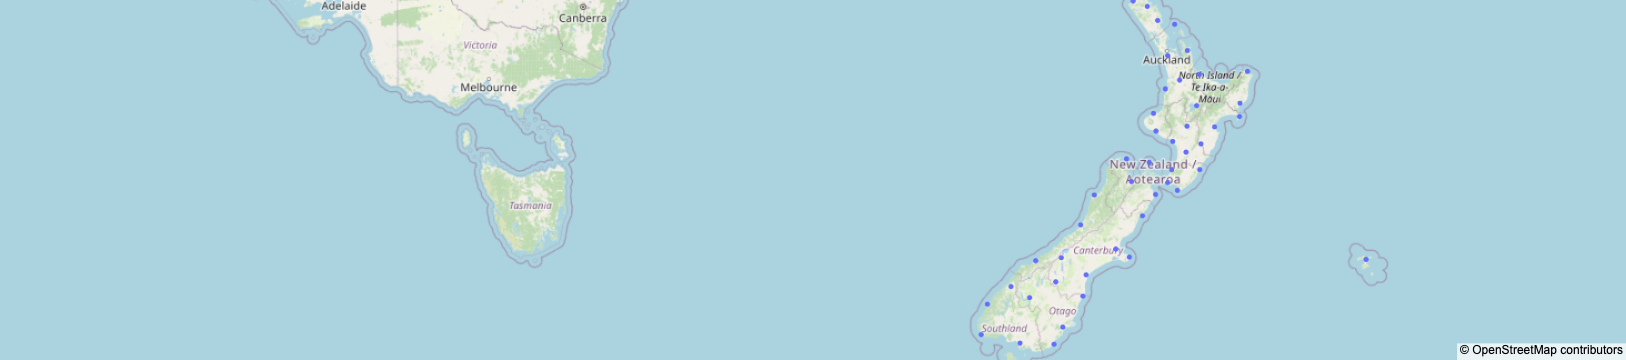

In [6]:
# Centro do mapa (média das coords)
center_lat = df["Latitude"].mean()
center_lon = df["Longitude"].mean()

# Mapa interativo
fig = px.scatter_mapbox(
    df,
    lat="Latitude",
    lon="Longitude",
    hover_name="station_name",
    zoom=4,
    height=650
)
fig.update_layout(
    mapbox_style="open-street-map",
    mapbox_center={"lat": center_lat, "lon": center_lon},
    margin={"l":0, "r":0, "t":0, "b":0},
)

# Mostrar na tela
fig.show()

In [ ]:
df = 

In [8]:
# import plotly.express as px
# import plotly.io as pio
# import numpy as np

# ---------- Parâmetros de figura para artigo ----------
TITLE = "Estações meteorológicas (rede de referência)"
MARKER_SIZE = 10                  # tamanho padrão
MARKER_LINE_WIDTH = 1.2           # contorno p/ contraste
FIG_HEIGHT = 700                  # px
FIG_WIDTH  = 900                  # px (~3:2)
HOVER_TEMPL = (
    "<b>%{customdata[0]}</b><br>"
    "Lat: %{lat:.3f} | Lon: %{lon:.3f}<br>"
    "%{customdata[1]}"            # exibe campo extra (ex.: país/estado)
)

# Campos opcionais para cor e info extra no hover:
has_region = "region" in df.columns          # ex.: país/estado/cluster
hover_extra = df["region"] if has_region else np.repeat("", len(df))

# Centro do mapa
center_lat = df["Latitude"].mean()
center_lon = df["Longitude"].mean()

# ---------- Mapa ----------
fig = px.scatter_mapbox(
    df,
    lat="Latitude",
    lon="Longitude",
    hover_name="station_name",
    color="region" if has_region else None,   # legenda por região/cluster (se existir)
    height=FIG_HEIGHT,
    width=FIG_WIDTH,
    zoom=4
)

# Estética dos marcadores
# fig.update_traces(
#     marker=dict(size=MARKER_SIZE, opacity=0.92, line=dict(width=MARKER_LINE_WIDTH, color="white")),
#     # hover com campos customizados
#     customdata=np.c_[df["station_name"], hover_extra],
#     hovertemplate=HOVER_TEMPL
# )
fig.update_traces(
    marker=dict(
        size=10,
        opacity=0.92,
        color="royalblue",
        line=dict(width=1.2, color="white")  # contorno do marcador
    ),
    hovertemplate="<b>%{hovertext}</b><br>Lat: %{lat:.3f}<br>Lon: %{lon:.3f}<extra></extra>"
)

# (Opcional) Rótulos fixos no mapa (cuidado com poluição visual).
# Ative se tiver poucas estações ou para uma versão “rótulos”.
ADD_LABELS = False
if ADD_LABELS:
    fig.update_traces(text=df["station_name"], textposition="top center", mode="markers+text")

# Layout para artigo
fig.update_layout(
    title=dict(text=TITLE, x=0.5, xanchor="center", y=0.95, font=dict(size=20)),
    mapbox_style="open-street-map",
    mapbox_center={"lat": center_lat, "lon": center_lon},
    margin=dict(l=10, r=10, t=60, b=10),
    legend=dict(
        title="Região" if has_region else "",
        orientation="h", yanchor="bottom", y=0.01, xanchor="center", x=0.5,
        bgcolor="rgba(255,255,255,0.7)"
    )
)

# Texto de crédito/caption no rodapé da figura (útil para versão estática)
fig.add_annotation(
    text="Base: rede de estações; Mapa: OpenStreetMap | Figura: Plotly",
    showarrow=False, xref="paper", yref="paper", x=0.5, y=-0.06,
    font=dict(size=12, color="gray"), xanchor="center"
)

# Mostrar interativo (HTML)
fig.show()

# ---------- Exportação em alta qualidade ----------
# Recomendado para artigo: SVG (vetorial) e/ou PNG 300 dpi
# pip install -U kaleido
# Nota: o Kaleido não requer Chrome recente do Plotly; se ver erro, atualize plotly e kaleido.
DPI = 300
width_in = 6.0
height_in = width_in * (FIG_HEIGHT/FIG_WIDTH)   # mantém proporção
px_width = int(width_in * DPI)
px_height = int(height_in * DPI)

# PNG 300 dpi (~vector-like se grande) e SVG (vetorial de verdade)
pio.write_image(fig, "stations_map_300dpi.png", format="png", width=px_width, height=px_height, scale=1)
pio.write_image(fig, "stations_map.svg", format="svg")  # perfeito para LaTeX/Word

/tmp/ipykernel_3529990/1007685603.py:26: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



ValueError: Invalid property specified for object of type plotly.graph_objs.scattermapbox.Marker: 'line'

Did you mean "size"?

    Valid properties:
        allowoverlap
            Flag to draw all symbols, even if they overlap.
        angle
            Sets the marker orientation from true North, in degrees
            clockwise. When using the "auto" default, no rotation
            would be applied in perspective views which is
            different from using a zero angle.
        anglesrc
            Sets the source reference on Chart Studio Cloud for
            `angle`.
        autocolorscale
            Determines whether the colorscale is a default palette
            (`autocolorscale: true`) or the palette determined by
            `marker.colorscale`. Has an effect only if in
            `marker.color` is set to a numerical array. In case
            `colorscale` is unspecified or `autocolorscale` is
            true, the default palette will be chosen according to
            whether numbers in the `color` array are all positive,
            all negative or mixed.
        cauto
            Determines whether or not the color domain is computed
            with respect to the input data (here in `marker.color`)
            or the bounds set in `marker.cmin` and `marker.cmax`
            Has an effect only if in `marker.color` is set to a
            numerical array. Defaults to `false` when `marker.cmin`
            and `marker.cmax` are set by the user.
        cmax
            Sets the upper bound of the color domain. Has an effect
            only if in `marker.color` is set to a numerical array.
            Value should have the same units as in `marker.color`
            and if set, `marker.cmin` must be set as well.
        cmid
            Sets the mid-point of the color domain by scaling
            `marker.cmin` and/or `marker.cmax` to be equidistant to
            this point. Has an effect only if in `marker.color` is
            set to a numerical array. Value should have the same
            units as in `marker.color`. Has no effect when
            `marker.cauto` is `false`.
        cmin
            Sets the lower bound of the color domain. Has an effect
            only if in `marker.color` is set to a numerical array.
            Value should have the same units as in `marker.color`
            and if set, `marker.cmax` must be set as well.
        color
            Sets the marker color. It accepts either a specific
            color or an array of numbers that are mapped to the
            colorscale relative to the max and min values of the
            array or relative to `marker.cmin` and `marker.cmax` if
            set.
        coloraxis
            Sets a reference to a shared color axis. References to
            these shared color axes are "coloraxis", "coloraxis2",
            "coloraxis3", etc. Settings for these shared color axes
            are set in the layout, under `layout.coloraxis`,
            `layout.coloraxis2`, etc. Note that multiple color
            scales can be linked to the same color axis.
        colorbar
            :class:`plotly.graph_objects.scattermapbox.marker.Color
            Bar` instance or dict with compatible properties
        colorscale
            Sets the colorscale. Has an effect only if in
            `marker.color` is set to a numerical array. The
            colorscale must be an array containing arrays mapping a
            normalized value to an rgb, rgba, hex, hsl, hsv, or
            named color string. At minimum, a mapping for the
            lowest (0) and highest (1) values are required. For
            example, `[[0, 'rgb(0,0,255)'], [1, 'rgb(255,0,0)']]`.
            To control the bounds of the colorscale in color space,
            use `marker.cmin` and `marker.cmax`. Alternatively,
            `colorscale` may be a palette name string of the
            following list: Blackbody,Bluered,Blues,Cividis,Earth,E
            lectric,Greens,Greys,Hot,Jet,Picnic,Portland,Rainbow,Rd
            Bu,Reds,Viridis,YlGnBu,YlOrRd.
        colorsrc
            Sets the source reference on Chart Studio Cloud for
            `color`.
        opacity
            Sets the marker opacity.
        opacitysrc
            Sets the source reference on Chart Studio Cloud for
            `opacity`.
        reversescale
            Reverses the color mapping if true. Has an effect only
            if in `marker.color` is set to a numerical array. If
            true, `marker.cmin` will correspond to the last color
            in the array and `marker.cmax` will correspond to the
            first color.
        showscale
            Determines whether or not a colorbar is displayed for
            this trace. Has an effect only if in `marker.color` is
            set to a numerical array.
        size
            Sets the marker size (in px).
        sizemin
            Has an effect only if `marker.size` is set to a
            numerical array. Sets the minimum size (in px) of the
            rendered marker points.
        sizemode
            Has an effect only if `marker.size` is set to a
            numerical array. Sets the rule for which the data in
            `size` is converted to pixels.
        sizeref
            Has an effect only if `marker.size` is set to a
            numerical array. Sets the scale factor used to
            determine the rendered size of marker points. Use with
            `sizemin` and `sizemode`.
        sizesrc
            Sets the source reference on Chart Studio Cloud for
            `size`.
        symbol
            Sets the marker symbol. Full list:
            https://www.mapbox.com/maki-icons/ Note that the array
            `marker.color` and `marker.size` are only available for
            "circle" symbols.
        symbolsrc
            Sets the source reference on Chart Studio Cloud for
            `symbol`.
        
Did you mean "size"?

Bad property path:
line
^^^^

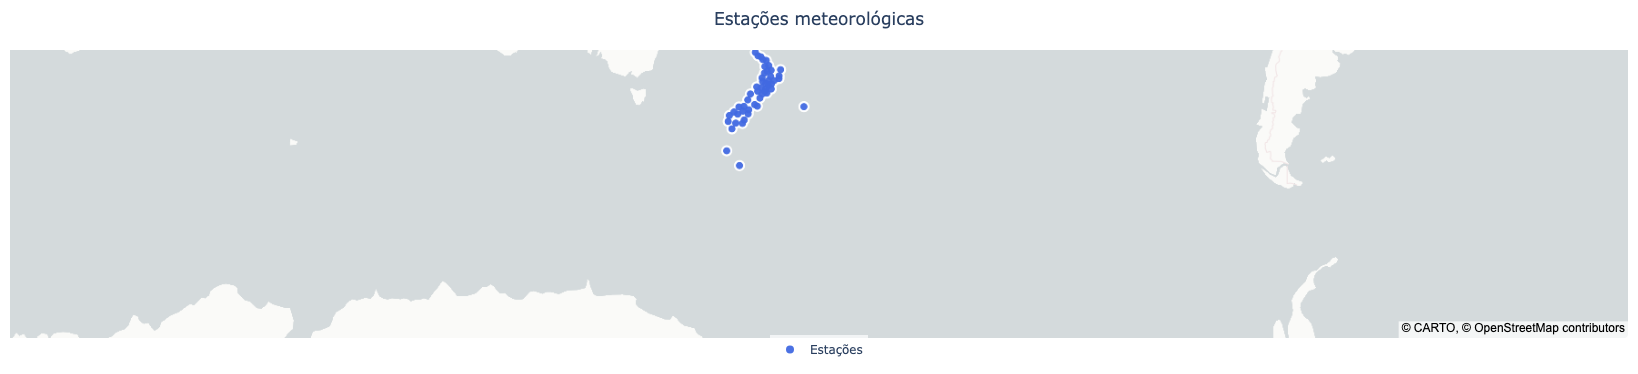

In [9]:
import plotly.express as px
import plotly.graph_objects as go

# Centro
center_lat = df["Latitude"].mean()
center_lon = df["Longitude"].mean()

# --- Figura com duas camadas para simular contorno ---
fig = go.Figure()

# 1) “Contorno” branco (maior)
fig.add_trace(go.Scattermap(
    lat=df["Latitude"],
    lon=df["Longitude"],
    mode="markers",
    marker=dict(size=12, color="white", opacity=1.0),
    hoverinfo="skip",           # não precisa hover na camada de baixo
    showlegend=False
))

# 2) Marcador principal (menor, colorido)
fig.add_trace(go.Scattermap(
    lat=df["Latitude"],
    lon=df["Longitude"],
    mode="markers",
    marker=dict(size=8, color="royalblue", opacity=0.95, symbol="circle"),
    text=df["station_name"],
    hovertemplate="<b>%{text}</b><br>Lat: %{lat:.3f} | Lon: %{lon:.3f}<extra></extra>",
    name="Estações"
))

# Layout “cara de artigo”
fig.update_layout(
    title=dict(text="Estações meteorológicas", x=0.5, xanchor="center"),
    margin=dict(l=10, r=10, t=50, b=10),
    map=dict(
        style="carto-positron",               # limpo e com bom contraste
        center=dict(lat=center_lat, lon=center_lon),
        zoom=4
    ),
    legend=dict(orientation="h", y=0.01, x=0.5, xanchor="center", bgcolor="rgba(255,255,255,0.7)")
)

fig.show()


/tmp/ipykernel_3529990/1408928066.py:6: DeprecationWarning:

*scattermapbox* is deprecated! Use *scattermap* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/

/tmp/ipykernel_3529990/1408928066.py:14: DeprecationWarning:

*scattermapbox* is deprecated! Use *scattermap* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



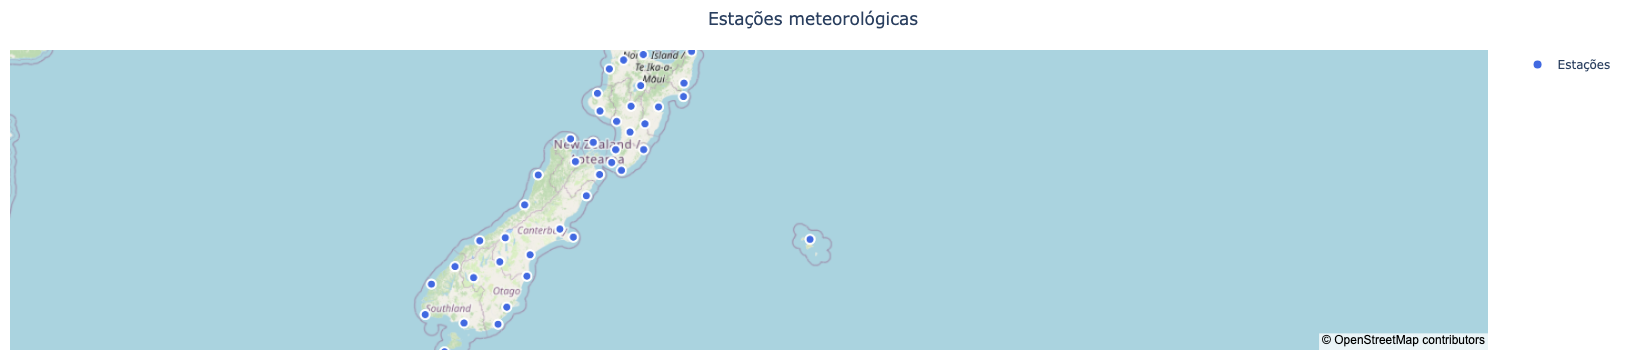

In [10]:
import plotly.graph_objects as go

fig = go.Figure()

# contorno
fig.add_trace(go.Scattermapbox(
    lat=df["Latitude"], lon=df["Longitude"],
    mode="markers",
    marker=dict(size=12, color="white"),
    hoverinfo="skip", showlegend=False
))

# principal
fig.add_trace(go.Scattermapbox(
    lat=df["Latitude"], lon=df["Longitude"],
    mode="markers",
    marker=dict(size=8, color="royalblue"),
    text=df["station_name"],
    hovertemplate="<b>%{text}</b><br>Lat: %{lat:.3f} | Lon: %{lon:.3f}<extra></extra>",
    name="Estações"
))

fig.update_layout(
    mapbox=dict(style="open-street-map", center=dict(lat=center_lat, lon=center_lon), zoom=4),
    margin=dict(l=10, r=10, t=50, b=10),
    title=dict(text="Estações meteorológicas", x=0.5)
)

fig.show()


/tmp/ipykernel_3529990/426273913.py:30: DeprecationWarning:

*scattermapbox* is deprecated! Use *scattermap* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/

/tmp/ipykernel_3529990/426273913.py:40: DeprecationWarning:

*scattermapbox* is deprecated! Use *scattermap* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



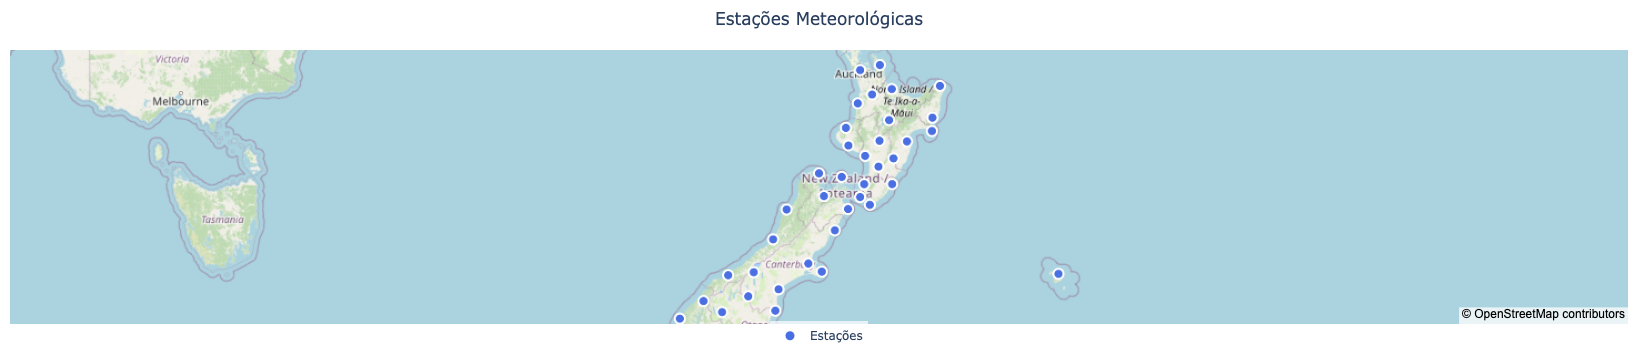

PNG salvo em 300 dpi: mapa_estacoes_300dpi.png (1800x1200px)


In [12]:
import plotly.graph_objects as go
import plotly.io as pio

# ---------- parâmetros ----------
TITULO = "Estações Meteorológicas"
COR = "royalblue"
TAMANHO_PONTO = 9
TAMANHO_CONTORNO = 13
ZOOM = 4

# exportação
DPI = 300
LARGURA_POL = 6.0
ASPECTO = 3/2
ALTURA_POL = LARGURA_POL / ASPECTO
LARGURA_PX = int(LARGURA_POL * DPI)
ALTURA_PX = int(ALTURA_POL * DPI)

# centro do mapa
# center_lat = float(df["Latitude"].mean())
# center_lon = float(df["Longitude"].mean())

center_lat = -41.0
center_lon = 173.0

# ---------- figura ----------
fig = go.Figure()

# Contorno branco
fig.add_trace(go.Scattermapbox(
    lat=df["Latitude"],
    lon=df["Longitude"],
    mode="markers",
    marker=dict(size=TAMANHO_CONTORNO, color="white", opacity=1.0, symbol="circle"),
    hoverinfo="skip",
    showlegend=False
))

# Pontos principais
fig.add_trace(go.Scattermapbox(
    lat=df["Latitude"],
    lon=df["Longitude"],
    mode="markers",
    marker=dict(size=TAMANHO_PONTO, color=COR, opacity=0.96, symbol="circle"),
    text=df["station_name"],
    hovertemplate="<b>%{text}</b><br>Latitude: %{lat:.3f} | Longitude: %{lon:.3f}<br>↳ Base: OpenStreetMap<extra></extra>",
    name="Estações"
))

# Layout
fig.update_layout(
    title=dict(text=TITULO, x=0.5, xanchor="center"),
    margin=dict(l=10, r=10, t=50, b=10),
    mapbox=dict(
        style="open-street-map",
        center=dict(lat=center_lat, lon=center_lon),
        zoom=ZOOM
    ),
    legend=dict(
        orientation="h",
        y=0.01, x=0.5, xanchor="center",
        bgcolor="rgba(255,255,255,0.7)"
    )
)

# Mostrar interativo
fig.show()

# ---------- exportar PNG 300 dpi ----------
pio.write_image(
    fig,
    "mapa_estacoes_300dpi.png",
    format="png",
    width=LARGURA_PX,
    height=ALTURA_PX,
    scale=1
)
print(f"PNG salvo em 300 dpi: mapa_estacoes_300dpi.png ({LARGURA_PX}x{ALTURA_PX}px)")


## Definindo arestas

In [6]:
NO_EDGE = np.inf

def osrm_route_distance_km(lat1, lon1, lat2, lon2, profile="driving", base_url="https://router.project-osrm.org"):
    """
    Consulta a API OSRM pública para obter a distância da rota em km.
    Retorna float(km) ou None se não existir rota.
    """
    # OSRM espera ordem: lon,lat;lon,lat
    url = f"{base_url}/route/v1/{profile}/{lon1},{lat1};{lon2},{lat2}"
    params = {
        "overview": "false",
        "alternatives": "false",
        "steps": "false",
        "annotations": "false"
    }
    try:
        r = requests.get(url, params=params, timeout=15)
        r.raise_for_status()
        data = r.json()
        if data.get("code") == "Ok" and data.get("routes"):
            dist_m = data["routes"][0]["distance"]
            return dist_m / 1000.0  # km
        return None
    except Exception:
        return None

In [7]:
def build_adjacency_osrm(df, station_col="station_name", lat_col="Latitude", lon_col="Longitude", undirected=True):
    n = len(df)
    idx = list(range(n))
    names = df[station_col].tolist()

    # matriz de adjacência (distância); diagonal = 0
    A = np.full((n, n), NO_EDGE, dtype=float)
    np.fill_diagonal(A, 0.0)

    # cache simples para evitar chamadas repetidas (par sem direção)
    cache = {}

    # itera pares i<j para grafo não-direcionado
    for i, j in combinations(idx, 2):
        lat1, lon1 = df.loc[i, lat_col], df.loc[i, lon_col]
        lat2, lon2 = df.loc[j, lat_col], df.loc[j, lon_col]
        key = tuple(sorted([(lat1, lon1), (lat2, lon2)]))

        if key in cache:
            dist = cache[key]
        else:
            dist = osrm_route_distance_km(lat1, lon1, lat2, lon2)
            cache[key] = dist

        if dist is not None:
            A[i, j] = dist
            if undirected:
                A[j, i] = dist
        else:
            # sem caminho: permanece NO_EDGE (np.inf)
            pass

    return pd.DataFrame(A, index=names, columns=names)

### com OSMNX

In [8]:
O_EDGE = np.inf

def subgraph_between_points(lat1, lon1, lat2, lon2, buffer_m=30000, network_type="drive"):
    """
    Baixa um subgrafo do OSM que cobre os dois pontos + um buffer (em metros).
    Isso reduz tempo/memória versus pegar o país inteiro.
    """
    # bounding box expandida
    north = max(lat1, lat2)
    south = min(lat1, lat2)
    east  = max(lon1, lon2)
    west  = min(lon1, lon2)

    # expande em metros (usa projeções internas do osmnx)
    # truque: pega um centro aproximado e um raio em metros que cubra a caixa + buffer
    center_lat = (lat1 + lat2) / 2
    center_lon = (lon1 + lon2) / 2

    # distância aproximada para cobrir diagonal da caixa (muito simples)
    # usa fórmula grosseira: 1 grau lat ~ 111 km; 1 grau lon ~ 111 km * cos(lat)
    lat_km = (north - south) * 111_000
    lon_km = (east - west) * 111_000 * np.cos(np.radians(center_lat))
    radius_m = int(np.hypot(lat_km, lon_km) / 2 + buffer_m)

    # baixa grafo centrado no meio dos pontos, com raio
    G = ox.graph_from_point((center_lat, center_lon), dist=radius_m, network_type=network_type, simplify=True)
    # adiciona pesos de comprimento em metros (se não existir)
    if "length" not in list(ox.graph_to_gdfs(G, nodes=False, edges=True).columns):
        G = ox.add_edge_lengths(G)

    return G

def osmnx_route_distance_km(G, lat1, lon1, lat2, lon2, weight="length"):
    """
    Calcula a menor rota no grafo com base no atributo 'length' (metros).
    Retorna distância em km ou None se não encontrar caminho.
    """
    try:
        # OSMNX nearest_nodes espera x=lon, y=lat
        orig = ox.distance.nearest_nodes(G, X=lon1, Y=lat1)
        dest = ox.distance.nearest_nodes(G, X=lon2, Y=lat2)

        route = nx.shortest_path(G, orig, dest, weight=weight)
        # soma comprimentos (em metros)
        dist_m = 0.0
        for u, v in zip(route[:-1], route[1:]):
            data = min(G[u][v].values(), key=lambda d: d.get(weight, np.inf))
            dist_m += data.get(weight, 0.0)
        return dist_m / 1000.0
    except Exception:
        return None

def build_adjacency_osmnx(df, station_col="station_name", lat_col="Latitude", lon_col="Longitude", undirected=True, buffer_m=30000):
    n = len(df)
    idx = list(range(n))
    names = df[station_col].tolist()
    A = np.full((n, n), NO_EDGE, dtype=float)
    np.fill_diagonal(A, 0.0)

    # itera pares (i, j)
    for i, j in combinations(idx, 2):
        lat1, lon1 = df.loc[i, lat_col], df.loc[i, lon_col]
        lat2, lon2 = df.loc[j, lat_col], df.loc[j, lon_col]

        # subgrafo mínimo capaz de cobrir o par
        G = subgraph_between_points(lat1, lon1, lat2, lon2, buffer_m=buffer_m, network_type="drive")
        dist = osmnx_route_distance_km(G, lat1, lon1, lat2, lon2)

        if dist is not None:
            A[i, j] = dist
            if undirected:
                A[j, i] = dist
        # caso contrário, permanece np.inf

    return pd.DataFrame(A, index=names, columns=names)

In [9]:
# adj_osmnx = build_adjacency_osmnx(df, buffer_m=30000)
# print(adj_osmnx)

In [10]:
# adj_osmnx

### Com osrm

In [11]:
adj_osrm = build_adjacency_osrm(df)
print(adj_osrm)

                          Le_Bons  Tauranga_Aerodrome  Enderby_Island  \
Le_Bons                    0.0000           1061.1512        701.8487   
Tauranga_Aerodrome      1061.1512              0.0000       1589.9288   
Enderby_Island           701.8487           1589.9288          0.0000   
Cape_Campbell            390.2741            709.3949        918.8231   
Whitianga_Aerodrome     1185.2180            168.5927       1713.7670   
Tara_Hills               391.5745           1279.6546        399.9712   
Napier_Aerodrome         856.9942            284.7898       1385.5431   
Hawera_NZHAX             814.3317            375.1014       1342.8806   
Secretary_Island         784.5451           1672.6252        235.0035   
Queenstown_Aerodrome     546.4084           1434.4885        249.4107   
Christchurch_Aerodrome   101.4297            967.4920        624.0746   
South_West               702.2318           1590.3119          3.1958   
Invercargill_NZNVA       647.2918           1535.37

In [20]:
adj_osrm

,Le_Bons,Tauranga_Aerodrome,Enderby_Island,Cape_Campbell,Whitianga_Aerodrome,Tara_Hills,Napier_Aerodrome,Hawera_NZHAX,Secretary_Island,Queenstown_Aerodrome,Christchurch_Aerodrome,South_West,Invercargill_NZNVA,Palmerston_N,Oamaru_Aerodrome,Kaikoura_NZKIX,Whanganui_Aerodrome,Taupo_Aerodrome,Hokitika_Aerodrome,Nugget_Point,Mokohinau_Island,Ngawi_NZNWX,Mt_Cook,Cape_Reinga,Auckland_Aerodrome,Hamilton_Aerodrome,Wellington_Aerodrome,New_Plymouth,Haast_NZHTX,Stephens_Island,Milford_Sound,Gisborne_Aerodrome,Puysegur_Point,Nelson_Aerodrome,Timaru_Airport,Hicks_Bay,Port_Taharoa,Farewell_Spit,Castlepoint_NZCPX,Chatham_Island,Kerikeri_Aerodrome,Raoul_Island,Dunedin_Aerodrome,Whangarei_Aerodrome,Kaitaia_Aerodrome,Paraparaumu_Aerodrome,Takapau_Plains,Waiouru_Aerodrome,Mahia_NZMHX,Campbell_Island,Westport_Aerodrome
Le_Bons,0.0000,1061.1512,701.8487,390.2741,1185.2180,391.5745,856.9942,814.3317,784.5451,546.4084,101.4297,702.2318,647.2918,682.8032,304.3907,277.3259,726.9220,898.4099,326.1205,549.1643,1310.0815,676.1156,396.3774,1592.3211,1160.4270,1038.6792,542.4131,885.1341,604.7157,568.2029,827.0813,1058.0466,737.6888,508.0738,227.1707,1245.2445,1045.6227,620.1611,698.5104,inf,1411.9619,inf,459.9305,1335.4863,1491.0302,587.3357,752.1183,799.6837,1022.6465,703.0560,424.7472
Tauranga_Aerodrome,1061.1512,0.0000,1589.9288,709.3949,168.5927,1279.6546,284.7898,375.1014,1672.6252,1434.4885,967.4920,1590.3119,1535.3719,394.9784,1192.4708,786.2613,376.3111,153.9144,1015.7791,1437.2444,366.9014,591.2383,1284.4575,649.1409,217.2469,108.6953,535.1104,307.1509,1294.3743,781.3941,1715.1614,266.5410,1625.7689,742.2099,1115.2508,279.3090,204.7113,889.7283,552.5170,inf,468.7818,inf,1348.0106,392.3062,547.8501,479.7730,374.3691,266.5794,352.1075,1591.1361,915.5415
Enderby_Island,701.8487,1589.9288,0.0000,918.8231,1713.7670,399.9712,1385.5431,1342.8806,235.0035,249.4107,624.0746,3.1958,75.8097,1211.3521,400.1578,805.8749,1255.4709,1426.9588,728.7082,212.3119,1838.6304,1204.6645,494.0420,2120.8700,1688.9759,1567.2281,1070.9621,1413.6831,455.2925,1096.7519,341.7410,1586.5955,188.5066,1047.8352,479.7957,1773.7935,1574.1716,1159.9225,1227.0594,inf,1940.5109,inf,246.5075,1864.0353,2019.5792,1115.8846,1280.6672,1328.2326,1551.1954,4.0704,868.8858
Cape_Campbell,390.2741,709.3949,918.8231,0.0000,833.4000,608.7157,505.1761,462.5136,1001.6863,763.5496,296.5531,919.3730,864.4330,330.9851,521.5319,115.3225,375.1039,546.5918,418.2942,766.3055,958.2634,324.2975,613.5186,1240.5030,808.6089,686.8611,190.5951,533.3161,696.8894,216.3849,1044.2225,706.2285,954.8301,177.2007,444.3119,893.4265,693.8046,324.7191,346.6924,inf,1060.1439,inf,677.0717,983.6683,1139.2122,235.5176,400.3002,447.8656,670.8284,920.1972,318.0567
Whitianga_Aerodrome,1185.2180,168.5927,1713.7670,833.4000,0.0000,1403.6258,417.9044,462.4461,1796.5964,1558.4597,1091.4632,1714.2831,1659.3431,518.9496,1316.4420,910.2325,500.2823,287.0290,1139.7503,1561.2156,324.4265,715.2095,1408.4287,606.6661,174.7720,180.8503,659.0816,394.4956,1418.3455,905.3653,1839.1326,433.7389,1749.7401,866.1812,1239.2220,446.5068,283.4097,1013.6995,676.4882,inf,426.3069,inf,1471.9818,349.8313,505.3752,603.7442,507.4837,390.5506,519.3054,1715.1073,1039.5127
Tara_Hills,391.5745,1279.6546,399.9712,608.7157,1403.6258,0.0000,1075.2781,1032.6156,396.3578,158.2211,313.8095,400.4009,342.9842,901.0871,126.4169,495.6098,945.2059,1116.6938,471.9514,310.5090,1528.3654,894.3994,97.4580,1810.6049,1378.7109,1256.9631,760.6970,1103.4180,243.0456,786.4868,438.8940,1276.3305,387.7228,727.4247,179.8785,1463.5284,1263.9065,839.5120,916.7943,inf,1630.2458,inf,266.5644,1553.7702,1709.3141,805.6196,970.4022,1017.9676,1240.9304,401.2251,570.5781
Napier_Aerodrome,856.9942,284.7898,1385.5431,505.1761,417.9044,1075.2781,0.0000,347.8593,1472.6560,1234.5193,767.5228,1390.3426,1335.4026,191.0159,992.5016,586.2921,260.4496,139.7051,815.8098,1237.2752,543.2548,343.9540,1084.4883,825.4944,393.6003,285.0487,335.1412,413.2262,1094.4050,581.4249,1515.1921,211.2277,1425.7997,54

In [13]:
adj_osrm.head()

,Le_Bons,Tauranga_Aerodrome,Enderby_Island,Cape_Campbell,Whitianga_Aerodrome,Tara_Hills,Napier_Aerodrome,Hawera_NZHAX,Secretary_Island,Queenstown_Aerodrome,Christchurch_Aerodrome,South_West,Invercargill_NZNVA,Palmerston_N,Oamaru_Aerodrome,Kaikoura_NZKIX,Whanganui_Aerodrome,Taupo_Aerodrome,Hokitika_Aerodrome,Nugget_Point,Mokohinau_Island,Ngawi_NZNWX,Mt_Cook,Cape_Reinga,Auckland_Aerodrome,Hamilton_Aerodrome,Wellington_Aerodrome,New_Plymouth,Haast_NZHTX,Stephens_Island,Milford_Sound,Gisborne_Aerodrome,Puysegur_Point,Nelson_Aerodrome,Timaru_Airport,Hicks_Bay,Port_Taharoa,Farewell_Spit,Castlepoint_NZCPX,Chatham_Island,Kerikeri_Aerodrome,Raoul_Island,Dunedin_Aerodrome,Whangarei_Aerodrome,Kaitaia_Aerodrome,Paraparaumu_Aerodrome,Takapau_Plains,Waiouru_Aerodrome,Mahia_NZMHX,Campbell_Island,Westport_Aerodrome
Le_Bons,0.0000,1061.1512,701.8487,390.2741,1185.2180,391.5745,856.9942,814.3317,784.5451,546.4084,101.4297,702.2318,647.2918,682.8032,304.3907,277.3259,726.9220,898.4099,326.1205,549.1643,1310.0815,676.1156,396.3774,1592.3211,1160.4270,1038.6792,542.4131,885.1341,604.7157,568.2029,827.0813,1058.0466,737.6888,508.0738,227.1707,1245.2445,1045.6227,620.1611,698.5104,inf,1411.9619,inf,459.9305,1335.4863,1491.0302,587.3357,752.1183,799.6837,1022.6465,703.0560,424.7472
Tauranga_Aerodrome,1061.1512,0.0000,1589.9288,709.3949,168.5927,1279.6546,284.7898,375.1014,1672.6252,1434.4885,967.4920,1590.3119,1535.3719,394.9784,1192.4708,786.2613,376.3111,153.9144,1015.7791,1437.2444,366.9014,591.2383,1284.4575,649.1409,217.2469,108.6953,535.1104,307.1509,1294.3743,781.3941,1715.1614,266.5410,1625.7689,742.2099,1115.2508,279.3090,204.7113,889.7283,552.5170,inf,468.7818,inf,1348.0106,392.3062,547.8501,479.7730,374.3691,266.5794,352.1075,1591.1361,915.5415
Enderby_Island,701.8487,1589.9288,0.0000,918.8231,1713.7670,399.9712,1385.5431,1342.8806,235.0035,249.4107,624.0746,3.1958,75.8097,1211.3521,400.1578,805.8749,1255.4709,1426.9588,728.7082,212.3119,1838.6304,1204.6645,494.0420,2120.8700,1688.9759,1567.2281,1070.9621,1413.6831,455.2925,1096.7519,341.7410,1586.5955,188.5066,1047.8352,479.7957,1773.7935,1574.1716,1159.9225,1227.0594,inf,1940.5109,inf,246.5075,1864.0353,2019.5792,1115.8846,1280.6672,1328.2326,1551.1954,4.0704,868.8858
Cape_Campbell,390.2741,709.3949,918.8231,0.0000,833.4000,608.7157,505.1761,462.5136,1001.6863,763.5496,296.5531,919.3730,864.4330,330.9851,521.5319,115.3225,375.1039,546.5918,418.2942,766.3055,958.2634,324.2975,613.5186,1240.5030,808.6089,686.8611,190.5951,533.3161,696.8894,216.3849,1044.2225,706.2285,954.8301,177.2007,444.3119,893.4265,693.8046,324.7191,346.6924,inf,1060.1439,inf,677.0717,983.6683,1139.2122,235.5176,400.3002,447.8656,670.8284,920.1972,318.0567
Whitianga_Aerodrome,1185.2180,168.5927,1713.7670,833.4000,0.0000,1403.6258,417.9044,462.4461,1796.5964,1558.4597,1091.4632,1714.2831,1659.3431,518.9496,1316.4420,910.2325,500.2823,287.0290,1139.7503,1561.2156,324.4265,715.2095,1408.4287,606.6661,174.7720,180.8503,659.0816,394.4956,1418.3455,905.3653,1839.1326,433.7389,1749.7401,866.1812,1239.2220,446.5068,283.4097,1013.6995,676.4882,inf,426.3069,inf,1471.9818,349.8313,505.3752,603.7442,507.4837,390.5506,519.3054,1715.1073,1039.5127


In [27]:
adj_osrm.to_csv('matriz_adjacencia.csv', index=True)

In [2]:
(51 * 51)

2601

In [1]:
adj_osrm.shape

NameError: name 'adj_osrm' is not defined

In [24]:
adj_osrm.columns

Index(['Le_Bons', 'Tauranga_Aerodrome', 'Enderby_Island', 'Cape_Campbell',
       'Whitianga_Aerodrome', 'Tara_Hills', 'Napier_Aerodrome', 'Hawera_NZHAX',
       'Secretary_Island', 'Queenstown_Aerodrome', 'Christchurch_Aerodrome',
       'South_West', 'Invercargill_NZNVA', 'Palmerston_N', 'Oamaru_Aerodrome',
       'Kaikoura_NZKIX', 'Whanganui_Aerodrome', 'Taupo_Aerodrome',
       'Hokitika_Aerodrome', 'Nugget_Point', 'Mokohinau_Island', 'Ngawi_NZNWX',
       'Mt_Cook', 'Cape_Reinga', 'Auckland_Aerodrome', 'Hamilton_Aerodrome',
       'Wellington_Aerodrome', 'New_Plymouth', 'Haast_NZHTX',
       'Stephens_Island', 'Milford_Sound', 'Gisborne_Aerodrome',
       'Puysegur_Point', 'Nelson_Aerodrome', 'Timaru_Airport', 'Hicks_Bay',
       'Port_Taharoa', 'Farewell_Spit', 'Castlepoint_NZCPX', 'Chatham_Island',
       'Kerikeri_Aerodrome', 'Raoul_Island', 'Dunedin_Aerodrome',
       'Whangarei_Aerodrome', 'Kaitaia_Aerodrome', 'Paraparaumu_Aerodrome',
       'Takapau_Plains', 'Waiouru_Aerodro

In [26]:
adj_osrm.iloc[6]

Le_Bons                    856.9942
Tauranga_Aerodrome         284.7898
Enderby_Island            1385.5431
Cape_Campbell              505.1761
Whitianga_Aerodrome        417.9044
Tara_Hills                1075.2781
Napier_Aerodrome             0.0000
Hawera_NZHAX               347.8593
Secretary_Island          1472.6560
Queenstown_Aerodrome      1234.5193
Christchurch_Aerodrome     767.5228
South_West                1390.3426
Invercargill_NZNVA        1335.4026
Palmerston_N               191.0159
Oamaru_Aerodrome           992.5016
Kaikoura_NZKIX             586.2921
Whanganui_Aerodrome        260.4496
Taupo_Aerodrome            139.7051
Hokitika_Aerodrome         815.8098
Nugget_Point              1237.2752
Mokohinau_Island           543.2548
Ngawi_NZNWX                343.9540
Mt_Cook                   1084.4883
Cape_Reinga                825.4944
Auckland_Aerodrome         393.6003
Hamilton_Aerodrome         285.0487
Wellington_Aerodrome       335.1412
New_Plymouth               4

In [14]:
adj_osrm.to_csv("adj_osrm.csv", index=False)
adj_osrm.to_parquet("adj_osrm.parquet", index=False)

In [15]:
import numpy as np
import pandas as pd
import networkx as nx

# --- Pré-requisito: adj_osrm é um DataFrame NxN (distâncias em km).
# Índice e colunas devem ter a MESMA ordem e os mesmos rótulos (ex.: station_name).
# Example: adj_osrm.loc[adj_osrm.index, adj_osrm.index]  # garante alinhamento

def save_graph_from_adj(
    adj_df: pd.DataFrame,
    nodes_df: pd.DataFrame | None = None,  # opcional: df com atributos dos nós
    name_col: str = "station_name",
    lat_col: str = "Latitude",
    lon_col: str = "Longitude",
    filename_col: str = "Filename",
    directed: bool = False,
    symmetrize: str = "min",  # "min"|"mean"|"max"|None (para grafos não-dirigidos)
    adj_csv_path: str = "adjacency_osrm.csv",
    gexf_path: str = "rede_osrm.gexf",
    graphml_path: str = "rede_osrm.graphml",
    edgelist_path: str = "edges_osrm.csv",
):
    # 1) Sanitiza e garante alinhamento índice = colunas
    A = adj_df.copy()
    # converte strings "inf"/"nan" etc.
    A = A.replace([np.inf, "inf", "Inf", "INF"], np.inf).apply(pd.to_numeric, errors="coerce")
    # garante que as colunas sigam a ordem do índice (e existam)
    A = A.loc[A.index, A.index]
    # zera diagonal
    np.fill_diagonal(A.values, 0.0)

    # 2) Se grafo não-direcionado e a matriz não for perfeitamente simétrica, opcionalmente simetriza
    if not directed and symmetrize:
        if symmetrize == "min":
            A = pd.DataFrame(np.minimum(A.values, A.values.T), index=A.index, columns=A.columns)
        elif symmetrize == "mean":
            A = (A + A.T) / 2
        elif symmetrize == "max":
            A = pd.DataFrame(np.maximum(A.values, A.values.T), index=A.index, columns=A.columns)

    # 3) Cria grafo
    G = nx.DiGraph() if directed else nx.Graph()
    nodes = A.index.tolist()
    G.add_nodes_from(nodes)

    # 4) Atributos dos nós (opcional)
    if nodes_df is not None:
        meta = nodes_df.set_index(name_col)
        attrs = {}
        for n in nodes:
            if n in meta.index:
                attr = {}
                if lat_col in meta.columns:  attr["Latitude"]  = float(meta.at[n, lat_col])
                if lon_col in meta.columns:  attr["Longitude"] = float(meta.at[n, lon_col])
                if filename_col in meta.columns: attr["Filename"] = meta.at[n, filename_col]
                if attr:
                    attrs[n] = attr
        if attrs:
            nx.set_node_attributes(G, attrs)

    # 5) Adiciona arestas (peso = distância km)
    if directed:
        # adiciona todas as arestas u->v com distância finita e > 0
        for u in nodes:
            for v, d in A.loc[u].items():
                if u != v and np.isfinite(d) and d > 0:
                    G.add_edge(u, v, weight=float(d))
    else:
        # não-direcionado: só metade superior para não duplicar
        for i, u in enumerate(nodes):
            for j in range(i + 1, len(nodes)):
                v = nodes[j]
                d = float(A.iat[i, j])
                if np.isfinite(d) and d > 0:
                    G.add_edge(u, v, weight=d)

    # 6) Salva matriz de adjacência alinhada ao nodelist (np.inf para não-arestas)
    A_out = nx.to_numpy_array(G, nodelist=nodes, weight="weight", nonedge=np.inf)
    pd.DataFrame(A_out, index=nodes, columns=nodes).to_csv(adj_csv_path, index=True)

    # 7) Salva o grafo
    nx.write_gexf(G, gexf_path)       # bom pro Gephi
    nx.write_graphml(G, graphml_path) # interoperável com QGIS/Gephi/Neo4j tools

    # 8) Edgelist (u, v, weight) para inspeção rápida
    edges_df = nx.to_pandas_edgelist(G)
    # renomeia coluna de peso (de 'weight' para 'distance_km' por clareza)
    if "weight" in edges_df.columns:
        edges_df = edges_df.rename(columns={"weight": "distance_km"})
    edges_df.to_csv(edgelist_path, index=False)

    # resumo rápido
    print(f"Nos: {G.number_of_nodes()} | Arestas: {G.number_of_edges()}")
    return G

In [16]:
 G = save_graph_from_adj(adj_osrm, nodes_df=df)

Nos: 51 | Arestas: 1177


In [17]:
G

In [18]:
nx.write_graphml(G, "grafo.graphml")

In [23]:
adj_osrm.columns

Index(['Le_Bons', 'Tauranga_Aerodrome', 'Enderby_Island', 'Cape_Campbell',
       'Whitianga_Aerodrome', 'Tara_Hills', 'Napier_Aerodrome', 'Hawera_NZHAX',
       'Secretary_Island', 'Queenstown_Aerodrome', 'Christchurch_Aerodrome',
       'South_West', 'Invercargill_NZNVA', 'Palmerston_N', 'Oamaru_Aerodrome',
       'Kaikoura_NZKIX', 'Whanganui_Aerodrome', 'Taupo_Aerodrome',
       'Hokitika_Aerodrome', 'Nugget_Point', 'Mokohinau_Island', 'Ngawi_NZNWX',
       'Mt_Cook', 'Cape_Reinga', 'Auckland_Aerodrome', 'Hamilton_Aerodrome',
       'Wellington_Aerodrome', 'New_Plymouth', 'Haast_NZHTX',
       'Stephens_Island', 'Milford_Sound', 'Gisborne_Aerodrome',
       'Puysegur_Point', 'Nelson_Aerodrome', 'Timaru_Airport', 'Hicks_Bay',
       'Port_Taharoa', 'Farewell_Spit', 'Castlepoint_NZCPX', 'Chatham_Island',
       'Kerikeri_Aerodrome', 'Raoul_Island', 'Dunedin_Aerodrome',
       'Whangarei_Aerodrome', 'Kaitaia_Aerodrome', 'Paraparaumu_Aerodrome',
       'Takapau_Plains', 'Waiouru_Aerodro

In [28]:
G.nodes

NodeView(('Le_Bons', 'Tauranga_Aerodrome', 'Enderby_Island', 'Cape_Campbell', 'Whitianga_Aerodrome', 'Tara_Hills', 'Napier_Aerodrome', 'Hawera_NZHAX', 'Secretary_Island', 'Queenstown_Aerodrome', 'Christchurch_Aerodrome', 'South_West', 'Invercargill_NZNVA', 'Palmerston_N', 'Oamaru_Aerodrome', 'Kaikoura_NZKIX', 'Whanganui_Aerodrome', 'Taupo_Aerodrome', 'Hokitika_Aerodrome', 'Nugget_Point', 'Mokohinau_Island', 'Ngawi_NZNWX', 'Mt_Cook', 'Cape_Reinga', 'Auckland_Aerodrome', 'Hamilton_Aerodrome', 'Wellington_Aerodrome', 'New_Plymouth', 'Haast_NZHTX', 'Stephens_Island', 'Milford_Sound', 'Gisborne_Aerodrome', 'Puysegur_Point', 'Nelson_Aerodrome', 'Timaru_Airport', 'Hicks_Bay', 'Port_Taharoa', 'Farewell_Spit', 'Castlepoint_NZCPX', 'Chatham_Island', 'Kerikeri_Aerodrome', 'Raoul_Island', 'Dunedin_Aerodrome', 'Whangarei_Aerodrome', 'Kaitaia_Aerodrome', 'Paraparaumu_Aerodrome', 'Takapau_Plains', 'Waiouru_Aerodrome', 'Mahia_NZMHX', 'Campbell_Island', 'Westport_Aerodrome'))